In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv("Data_supplychain.csv")


In [3]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
len(df[df.duplicated()])

0

As we can See their are no duplicate values in the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

First we will treat null value so we can perform EDA part

In [6]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

As we can see there are Null value in workers_num,workers_num and,workers_num lets see the percentage 

In [7]:
df.isnull().sum()/len(df)*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [8]:
df.isnull().sum().sum()

13779

As we can see there are 47% null value in wh_est_year which we can not capping because it can effect the data.
so we will drop all null values row wise

In [9]:
 df=df.dropna()

In [10]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

We can see we have removed all null values , after drop null values we have 12127 entries left 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12127 entries, 4 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 12127 non-null  object 
 1   WH_Manager_ID                 12127 non-null  object 
 2   Location_type                 12127 non-null  object 
 3   WH_capacity_size              12127 non-null  object 
 4   zone                          12127 non-null  object 
 5   WH_regional_zone              12127 non-null  object 
 6   num_refill_req_l3m            12127 non-null  int64  
 7   transport_issue_l1y           12127 non-null  int64  
 8   Competitor_in_mkt             12127 non-null  int64  
 9   retail_shop_num               12127 non-null  int64  
 10  wh_owner_type                 12127 non-null  object 
 11  distributor_num               12127 non-null  int64  
 12  flood_impacted                12127 non-null  int64  
 13  f

# EDA

In [12]:
x=df.skew()

<AxesSubplot:ylabel='Count'>

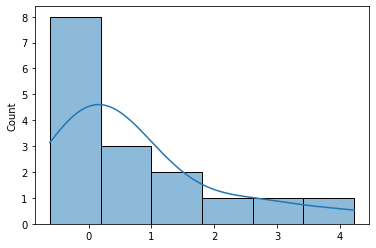

In [13]:
sns.histplot(x,kde=True)

As we can see data is Right  skew

<AxesSubplot:xlabel='product_wg_ton', ylabel='Density'>

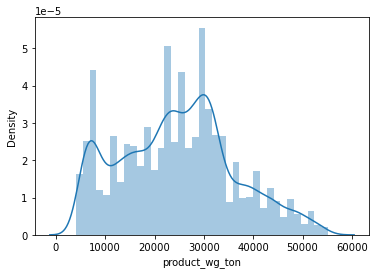

In [81]:
 sns.distplot(df["product_wg_ton"])

We can see the distribution of supply is not nomal distribution 

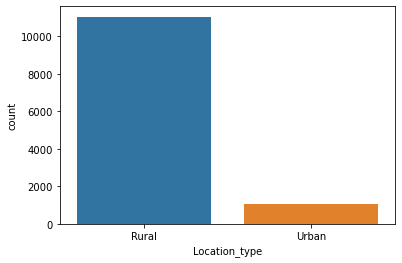

In [23]:
sns.countplot(x="Location_type",data=df)
plt.show()

As we can see from the graph Rular area has Max. supply and Urban area has less supply of goods 

In [24]:
(df.groupby(df['zone'])["WH_regional_zone"].count())

zone
East      212
North    4991
South    2979
West     3945
Name: WH_regional_zone, dtype: int64

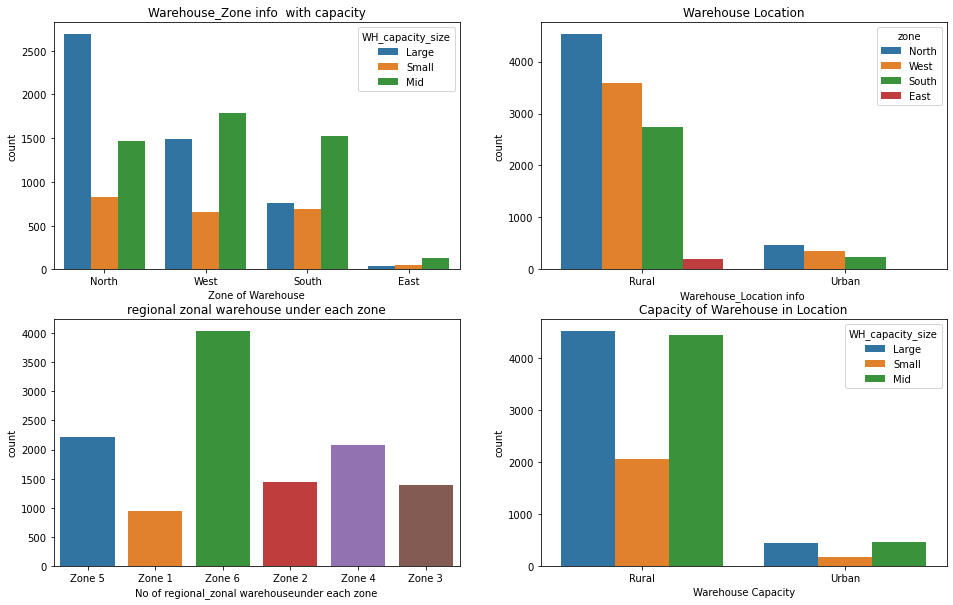

In [25]:
plt.subplots(2,2,figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(x='zone',hue='WH_capacity_size',data=df)
plt.xlabel('Zone of Warehouse')
plt.title('Warehouse_Zone info  with capacity')
# plt.show()

plt.subplot(2,2,2)
sns.countplot(x='Location_type',hue='zone',data=df)
plt.xlabel('Warehouse_Location info ')
plt.title('Warehouse Location')


plt.subplot(2,2,3)
sns.countplot(x="WH_regional_zone",data=df)
plt.xlabel('No of regional_zonal warehouseunder each zone')
plt.title('regional zonal warehouse under each zone')


plt.subplot(2,2,4)
sns.countplot(x='Location_type',hue='WH_capacity_size',data=df)
plt.xlabel('Warehouse Capacity')
plt.title('Capacity of Warehouse in Location')
plt.show()


From above graphs we can visualize the  following points:-

1- From first grap(Warehouse_Zone info  with capacity ) we can see the capacity of warehouse is large in north as compare to others zones and west zone has Mid capacity warehouse.  
2- In second graph(Warehouse Location),we can see in Rural areas company has more warehouse Zones  where as in  Urban its less.

3- As we can observe from 3rd graph(regional zonal warehouse under each zone),there are max. no. of warehouses in Zone-6 as comapare to others zones.

4-In graph "Warehouse Capacity", we can see Rural area has max. number of large and mid capacity warehouses available as compare to urban. 

Text(0.5, 1.0, 'Refill of product in Locations')

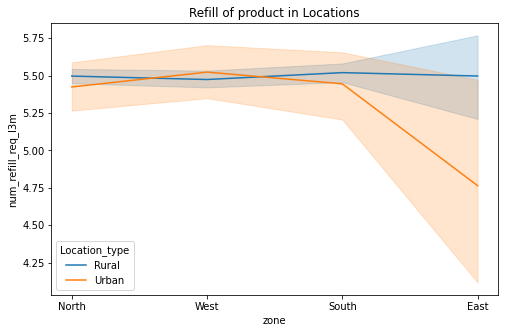

In [26]:
#making a lineplot of Refill of product in warehouse Locations.
plt.figure(figsize=(8,5))
sns.lineplot(data=df,y='num_refill_req_l3m',x='zone',hue='Location_type')
plt.title('Refill of product in Locations')

As we can observe from the above graph, the supply of the stock isn't fluctuating in Rural area but in Urban area there is less supply in east zone than the other zones.

Text(0.5, 1.0, 'Transportion issue in Locations')

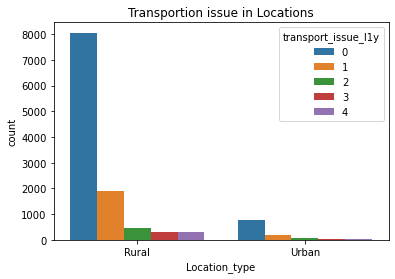

In [577]:
sns.countplot(x='Location_type',hue="transport_issue_l1y",data=df)
plt.title('Transportion issue in Locations')

In [578]:
df["Competitor_in_mkt"].value_counts()

2     4163
3     3439
4     3292
5      604
6      282
1      198
7       96
8       41
10       5
9        5
12       1
0        1
Name: Competitor_in_mkt, dtype: int64

In [579]:
(df.groupby(["WH_regional_zone"])["Competitor_in_mkt"].count())

WH_regional_zone
Zone 1     947
Zone 2    1434
Zone 3    1399
Zone 4    2082
Zone 5    2220
Zone 6    4045
Name: Competitor_in_mkt, dtype: int64

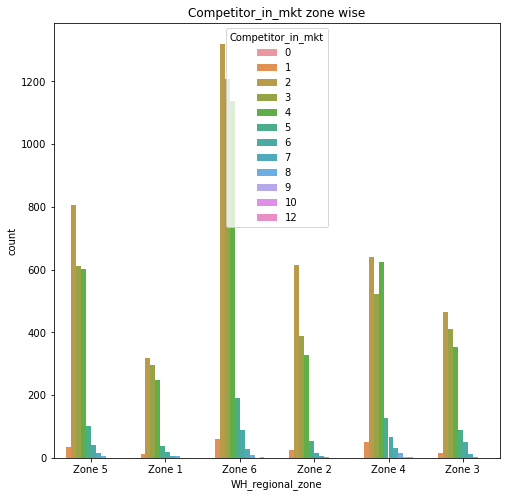

In [580]:
plt.figure(figsize=(8,8))
sns.countplot(x='WH_regional_zone',hue="Competitor_in_mkt",data=df)
plt.title('Competitor_in_mkt zone wise')
plt.show()

As we can see from the graph Max no. of competitor in zone 6

In [581]:
(df.groupby(["zone"])["Competitor_in_mkt"].count())

zone
East      212
North    4991
South    2979
West     3945
Name: Competitor_in_mkt, dtype: int64

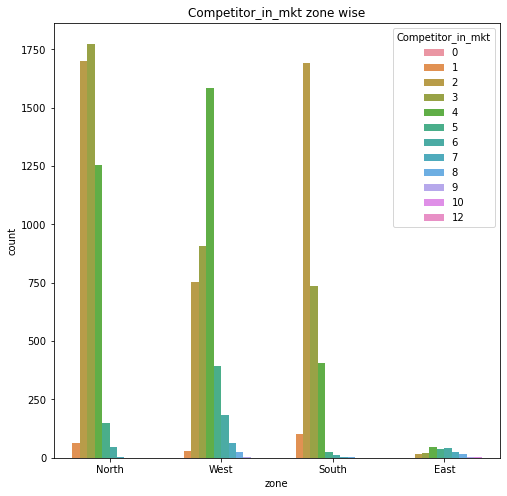

In [582]:
plt.figure(figsize=(8,8))
sns.countplot(x='zone',hue="Competitor_in_mkt",data=df)
plt.title('Competitor_in_mkt zone wise')
plt.show()

As we can see there are max. competitor in  North zone area

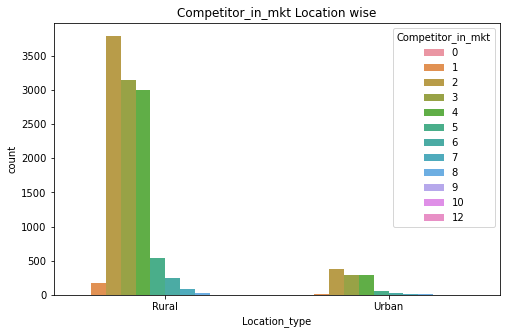

In [583]:
plt.figure(figsize=(8,5))
sns.countplot(x='Location_type',hue="Competitor_in_mkt",data=df)
plt.title('Competitor_in_mkt Location wise')
plt.show()

We can Observe there are Max competion in Rural area 

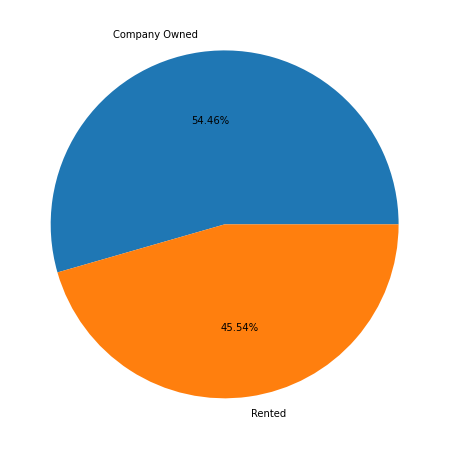

In [584]:
plt.figure(figsize=(8,8))
plt.pie(x=df['wh_owner_type'].value_counts(),labels=df['wh_owner_type'].value_counts().index,autopct='%0.2f%%',data=df)
plt.show()

As we can see there are 54.46% properties own by company itself

# No of Retails shops nearby Warehouses

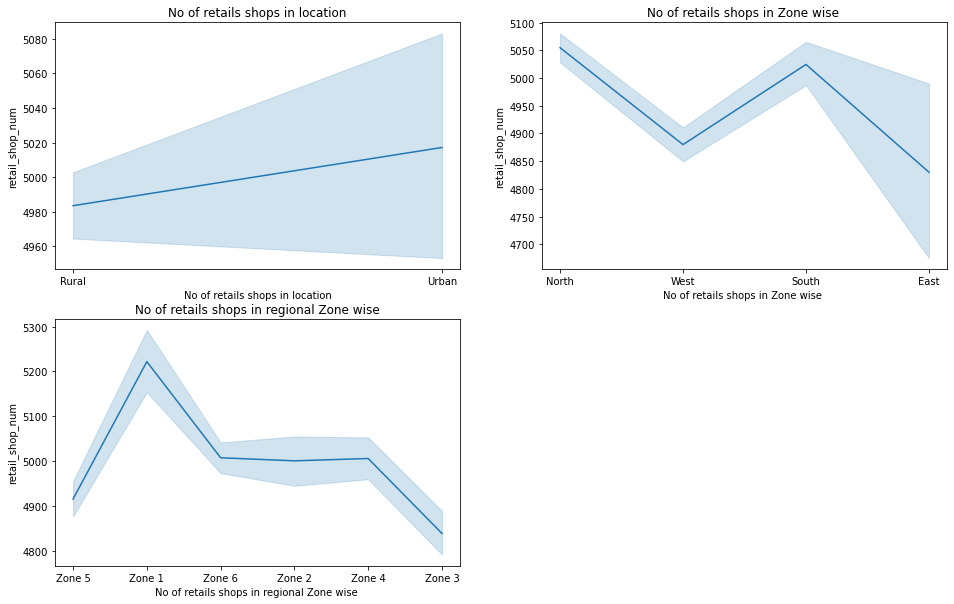

In [585]:
plt.subplots(2,1,figsize=(16,10))
plt.subplot(2,2,1)
sns.lineplot(data=df, x="Location_type", y="retail_shop_num",)
plt.xlabel('No of retails shops in location')
plt.title('No of retails shops in location')
# plt.show()

plt.subplot(2,2,2)
sns.lineplot(data=df, x="zone", y="retail_shop_num",)
plt.xlabel('No of retails shops in Zone wise ')
plt.title('No of retails shops in Zone wise ')


plt.subplot(2,2,3)
sns.lineplot(data=df, x="WH_regional_zone", y="retail_shop_num",)
plt.xlabel('No of retails shops in regional Zone wise ')
plt.title('No of retails shops in regional Zone wise')


plt.show()

1- From graph one('No of retails shops in location') we can see There are maximum number of retail shop in Urban area then Rural

2- from graph no. two ('No of retails shops in Zone wise ') we can see North zone has higher retails shop and in East zone Min. no. of retails shops

3-from graph no 3 ('No of retails shops in regional Zone wise '), we can see ther are Max. no of retails shops in Zone1 and min No.of shops in zone 3

# No.of Distributer of the company

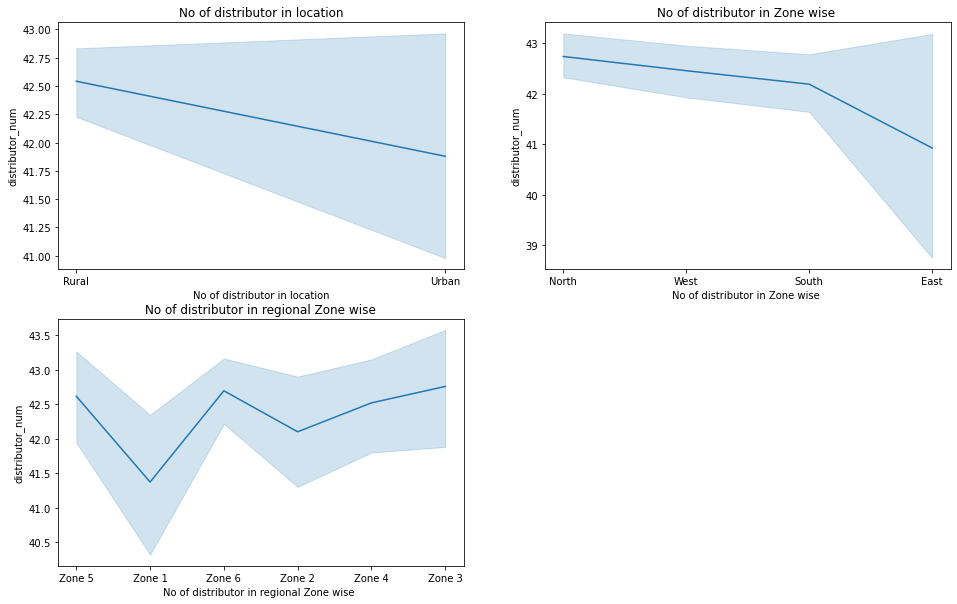

In [586]:
plt.subplots(2,1,figsize=(16,10))
plt.subplot(2,2,1)
sns.lineplot(data=df, x="Location_type", y="distributor_num")
plt.xlabel('No of distributor in location')
plt.title('No of distributor in location')
# plt.show()

plt.subplot(2,2,2)
sns.lineplot(data=df, x="zone", y="distributor_num",)
plt.xlabel('No of distributor in Zone wise ')
plt.title('No of distributor in Zone wise ')


plt.subplot(2,2,3)
sns.lineplot(data=df, x="WH_regional_zone", y="distributor_num",)
plt.xlabel('No of distributor in regional Zone wise ')
plt.title('No of distributor in regional Zone wise')


plt.show()

1- From graph one('No of distributor in location') we can see There are maximum number distributors are in Rural area then Urban

2- from graph no. two ('No of distributor in Zone wise ') company has maximum distributers in North Zone and East has minimum

3-from graph no 3 ('No of distributor in regional Zone wise '),Company has maimum distributer in zone3 ,6 and zone 5 , whereas min are in zone 1

# flood_impacted in warehouses

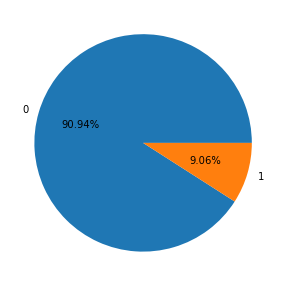

In [587]:
plt.figure(figsize=(5,5))
plt.pie(x=df['flood_impacted'].value_counts(),labels=df['flood_impacted'].value_counts().index,autopct='%0.2f%%',data=df)
plt.show()

As we can see there are 90.94% wharehouse  not effected by flood

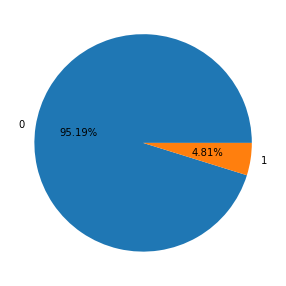

In [588]:
plt.figure(figsize=(5,5))
plt.pie(x=df['flood_proof'].value_counts(),labels=df['flood_proof'].value_counts().index,autopct='%0.2f%%',data=df)
plt.show()

We can see 95.19% Warehouses are flood proof 

# Product supply in Location

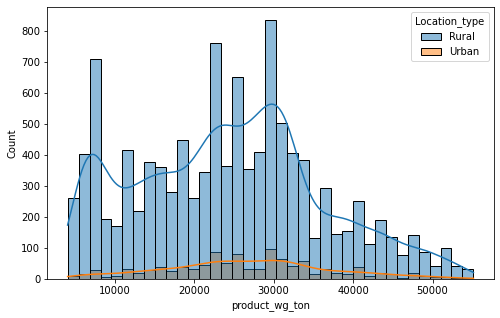

In [589]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='product_wg_ton',hue="Location_type",kde=True)
plt.show()

As we can observed from the Graph Maximum time 30000ton qualtity has been supplied in Rural and Urban Area

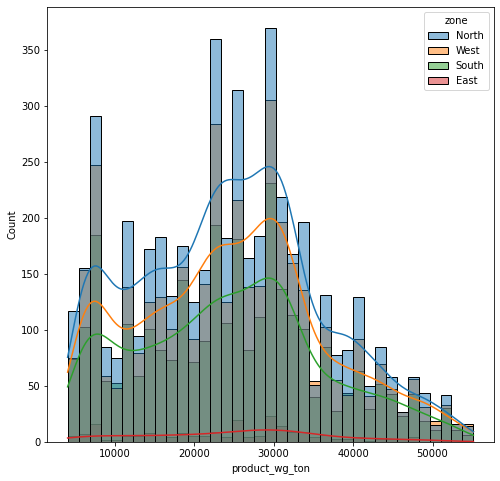

In [590]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='product_wg_ton',hue="zone",kde=True)
plt.show()

As we can see Maximum suppy went to north zone and max time demands raise around 30000 ton

<AxesSubplot:xlabel='product_wg_ton', ylabel='dist_from_hub'>

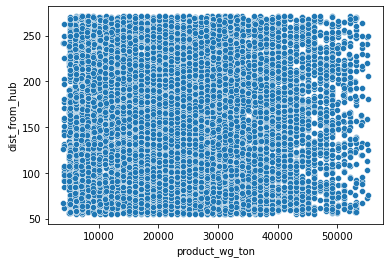

In [591]:
sns.scatterplot(data=df,x='product_wg_ton',y='dist_from_hub')


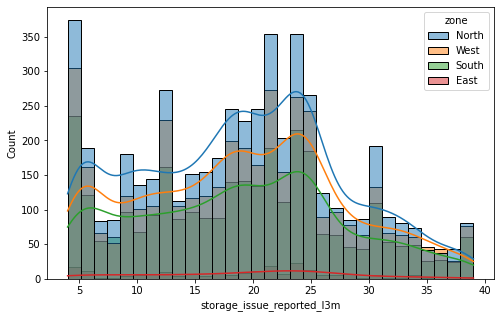

In [592]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='storage_issue_reported_l3m',hue="zone",kde=True)
plt.show()

As we can see maximum storages issue are coming from North Zone

<AxesSubplot:xlabel='product_wg_ton', ylabel='storage_issue_reported_l3m'>

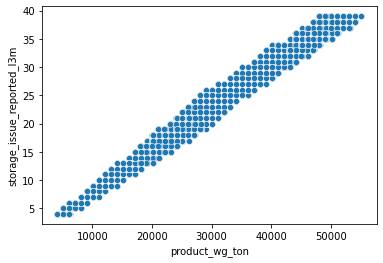

In [593]:
sns.scatterplot(data=df,x='product_wg_ton',y='storage_issue_reported_l3m')

As we can see from this Graph , Where storage issue are more there are maximum supply ,its mean storage issue strongly releted to supply

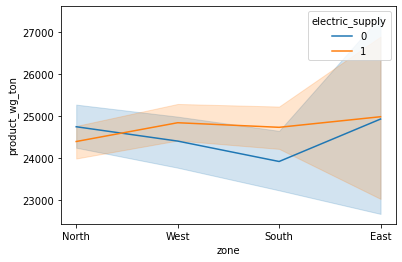

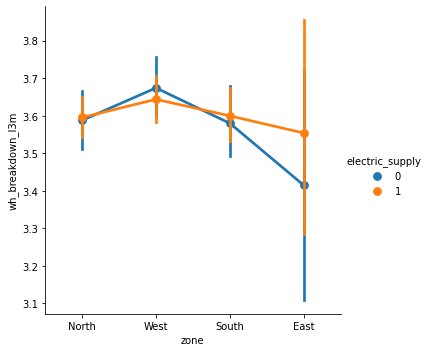

In [594]:
sns.lineplot(x="zone",y="product_wg_ton",hue="electric_supply",data=df,)
sns.factorplot(x ='zone', y ='wh_breakdown_l3m',
               hue = 'electric_supply', data = df)

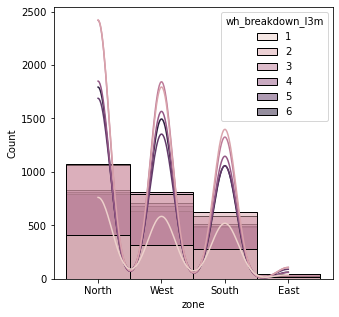

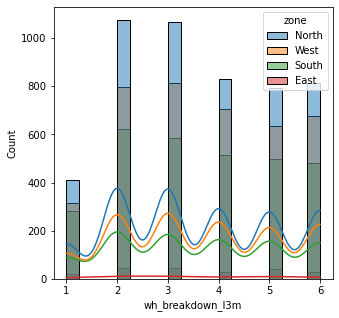

In [595]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,x='zone',hue='wh_breakdown_l3m',kde=True)
plt.show()
plt.figure(figsize=(5,5))
sns.histplot(data=df,x='wh_breakdown_l3m',hue='zone',kde=True)
plt.show()

As we can see from the graph maximum no of break down happend in North.another observation is electricity supply ,where it is on DG(1) ,there are major supply.there are another breakdown issue which are higher in zone north 

# PREPROCESSING

Now we will proceed preprocessing part we have done Null values treatment previouly .

In [27]:
df.isnull().sum().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12127 entries, 4 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 12127 non-null  object 
 1   WH_Manager_ID                 12127 non-null  object 
 2   Location_type                 12127 non-null  object 
 3   WH_capacity_size              12127 non-null  object 
 4   zone                          12127 non-null  object 
 5   WH_regional_zone              12127 non-null  object 
 6   num_refill_req_l3m            12127 non-null  int64  
 7   transport_issue_l1y           12127 non-null  int64  
 8   Competitor_in_mkt             12127 non-null  int64  
 9   retail_shop_num               12127 non-null  int64  
 10  wh_owner_type                 12127 non-null  object 
 11  distributor_num               12127 non-null  int64  
 12  flood_impacted                12127 non-null  int64  
 13  f

From the info we can understand there are no null value available now , there are 2 float ,14 int and 8 object type freature in this data base

Now we will check outlier

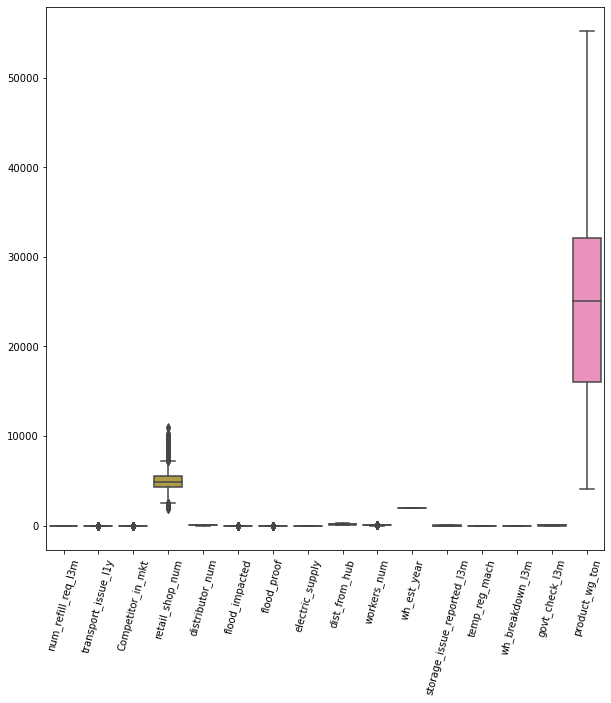

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=75)
plt.show()

<AxesSubplot:xlabel='retail_shop_num'>

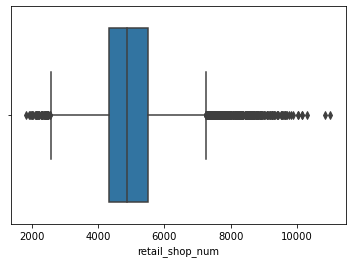

In [30]:
sns.boxplot(x='retail_shop_num',data=df)

<AxesSubplot:xlabel='retail_shop_num'>

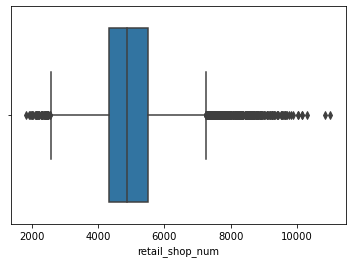

In [31]:
sns.boxplot(x='retail_shop_num',data=df)

As we can see there are very less number of outliyer so we do not need to apply outlier treatment 

We will drop some features which are not significant features 

In [32]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [33]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,...,1,77,27.0,2010.0,24,0,B,3,6,30142
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
10,WH_100010,EID_50010,Rural,Large,North,Zone 6,7,1,3,4623,...,1,150,37.0,1999.0,17,0,B+,4,6,21125


In [34]:
df_column=["Ware_house_ID","WH_Manager_ID","wh_owner_type","electric_supply","workers_num","wh_est_year","approved_wh_govt_certificate","govt_check_l3m"]

In [35]:
df1=df.drop(df_column,axis=1)

In [36]:
df1.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,product_wg_ton
4,Rural,Large,North,Zone 5,3,1,2,4740,42,1,0,112,18,0,6,24071
5,Rural,Small,West,Zone 1,8,0,2,5053,37,0,0,152,23,1,3,32134
6,Rural,Large,West,Zone 6,8,0,4,4449,38,0,0,77,24,0,3,30142
8,Rural,Small,South,Zone 6,8,1,4,5381,42,0,0,124,13,1,5,18082
10,Rural,Large,North,Zone 6,7,1,3,4623,31,0,0,150,17,0,4,21125


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12127 entries, 4 to 24999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Location_type               12127 non-null  object
 1   WH_capacity_size            12127 non-null  object
 2   zone                        12127 non-null  object
 3   WH_regional_zone            12127 non-null  object
 4   num_refill_req_l3m          12127 non-null  int64 
 5   transport_issue_l1y         12127 non-null  int64 
 6   Competitor_in_mkt           12127 non-null  int64 
 7   retail_shop_num             12127 non-null  int64 
 8   distributor_num             12127 non-null  int64 
 9   flood_impacted              12127 non-null  int64 
 10  flood_proof                 12127 non-null  int64 
 11  dist_from_hub               12127 non-null  int64 
 12  storage_issue_reported_l3m  12127 non-null  int64 
 13  temp_reg_mach               12127 non-null  in

Now we have 16 features left

Now we will perform one hot encoding to change data in numarical

In [38]:
df1=pd.get_dummies(df1,columns=["Location_type","WH_capacity_size","zone","WH_regional_zone"],drop_first=True)

In [39]:
df1.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
4,3,1,2,4740,42,1,0,112,18,0,...,0,0,1,0,0,0,0,0,1,0
5,8,0,2,5053,37,0,0,152,23,1,...,0,1,0,0,1,0,0,0,0,0
6,8,0,4,4449,38,0,0,77,24,0,...,0,0,0,0,1,0,0,0,0,1
8,8,1,4,5381,42,0,0,124,13,1,...,0,1,0,1,0,0,0,0,0,1
10,7,1,3,4623,31,0,0,150,17,0,...,0,0,1,0,0,0,0,0,0,1


In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12127 entries, 4 to 24999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   num_refill_req_l3m          12127 non-null  int64
 1   transport_issue_l1y         12127 non-null  int64
 2   Competitor_in_mkt           12127 non-null  int64
 3   retail_shop_num             12127 non-null  int64
 4   distributor_num             12127 non-null  int64
 5   flood_impacted              12127 non-null  int64
 6   flood_proof                 12127 non-null  int64
 7   dist_from_hub               12127 non-null  int64
 8   storage_issue_reported_l3m  12127 non-null  int64
 9   temp_reg_mach               12127 non-null  int64
 10  wh_breakdown_l3m            12127 non-null  int64
 11  product_wg_ton              12127 non-null  int64
 12  Location_type_Urban         12127 non-null  uint8
 13  WH_capacity_size_Mid        12127 non-null  uint8
 14  WH_cap

Now we will check  the correleation 

In [40]:
corr_matrix=df1.corr("spearman")

In [41]:
corr_matrix

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
num_refill_req_l3m,1.000000,0.003409,0.006950,-0.000654,0.007161,0.017008,0.000740,-0.007423,-0.021764,-0.005995,...,0.000415,-0.001716,-0.000544,0.007411,-0.005080,-0.002279,0.002426,0.000436,0.006464,-0.000753
transport_issue_l1y,0.003409,1.000000,-0.009204,-0.003017,-0.004871,0.005338,-0.012905,-0.004703,-0.055568,0.008289,...,-0.013888,0.011070,0.021212,-0.011685,-0.011511,-0.013526,-0.003220,-0.003771,0.007187,0.002356
Competitor_in_mkt,0.006950,-0.009204,1.000000,-0.184403,-0.001253,0.007791,-0.004495,0.013721,0.009678,0.016151,...,0.002508,0.011981,-0.073009,-0.309122,0.317537,-0.070117,0.015104,0.050510,-0.019349,0.015579
retail_shop_num,-0.000654,-0.003017,-0.184403,1.000000,-0.002114,-0.002076,-0.004716,-0.003341,0.003445,0.011297,...,-0.018622,0.086553,0.069031,0.019835,-0.081731,0.011323,-0.048094,0.006803,-0.029168,0.007302
distributor_num,0.007161,-0.004871,-0.001253,-0.002114,1.000000,0.001606,0.003274,-0.007635,0.010713,0.000466,...,-0.000924,-0.013720,0.013430,-0.010279,-0.000997,-0.008714,0.006185,0.001018,0.003906,0.009254
flood_impacted,0.017008,0.005338,0.007791,-0.002076,0.001606,1.000000,0.123756,-0.002499,0.000447,-0.004366,...,0.012042,-0.001484,0.016165,-0.007320,-0.007672,-0.004408,-0.006099,0.024619,-0.020193,0.003305
flood_proof,0.000740,-0.012905,-0.004495,-0.004716,0.003274,0.123756,1.000000,0.005152,0.011207,0.008170,...,0.012338,-0.004138,0.000047,0.000704,-0.001361,-0.002315,0.016584,0.003995,-0.001720,-0.007735
dist_from_hub,-0.007423,-0.004703,0.013721,-0.003341,-0.007635,-0.002499,0.005152,1.000000,-0.003524,0.007220,...,0.004105,-0.005932,-0.023219,0.017100,0.005935,0.000006,-0.006986,0.011257,-0.005681,0.000473
storage_issue_reported_l3m,-0.021764,-0.055568,0.009678,0.003445,0.010713,0.000447,0.011207,-0.003524,1.000000,0.007268,...,0.002207,0.005152,-0.003551,-0.005667,0.007080,0.013835,-0.004358,-0.005282,-0.010842,0.005635
temp_reg_mach,-0.005995,0.008289,0.016151,0.011297,0.000466,-0.004366,0.008170,0.007220,0.007268,1.000000,...,0.001334,0.004861,-0.005259,0.003800,0.001488,0.014672,-0.000668,-0.010261,0.008643,-0.007141


<AxesSubplot:>

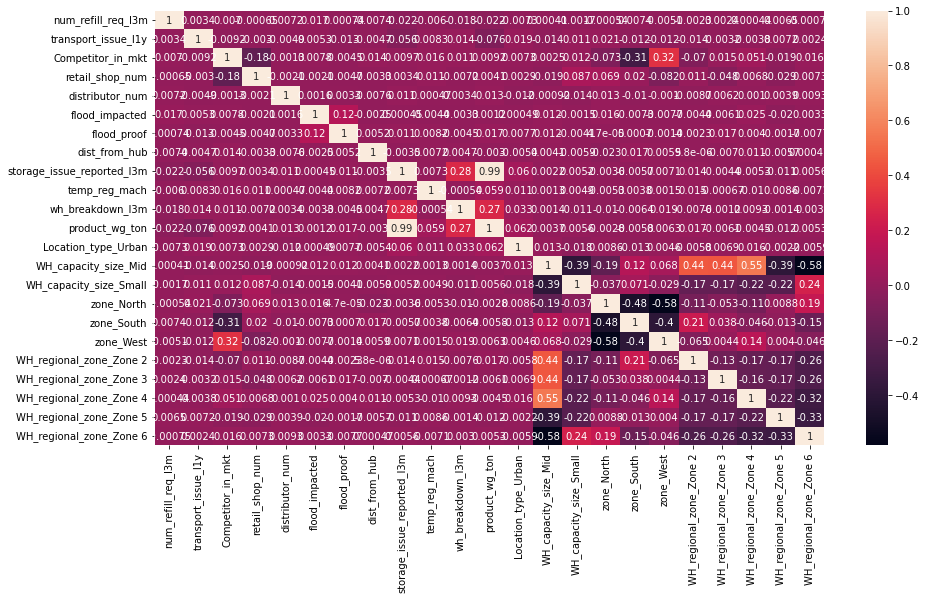

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)

In [43]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [44]:
upper

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
num_refill_req_l3m,NaN,0.003409,0.006950,-0.000654,0.007161,0.017008,0.000740,-0.007423,-0.021764,-0.005995,...,0.000415,-0.001716,-0.000544,0.007411,-0.005080,-0.002279,0.002426,0.000436,0.006464,-0.000753
transport_issue_l1y,NaN,NaN,-0.009204,-0.003017,-0.004871,0.005338,-0.012905,-0.004703,-0.055568,0.008289,...,-0.013888,0.011070,0.021212,-0.011685,-0.011511,-0.013526,-0.003220,-0.003771,0.007187,0.002356
Competitor_in_mkt,NaN,NaN,NaN,-0.184403,-0.001253,0.007791,-0.004495,0.013721,0.009678,0.016151,...,0.002508,0.011981,-0.073009,-0.309122,0.317537,-0.070117,0.015104,0.050510,-0.019349,0.015579
retail_shop_num,NaN,NaN,NaN,NaN,-0.002114,-0.002076,-0.004716,-0.003341,0.003445,0.011297,...,-0.018622,0.086553,0.069031,0.019835,-0.081731,0.011323,-0.048094,0.006803,-0.029168,0.007302
distributor_num,NaN,NaN,NaN,NaN,NaN,0.001606,0.003274,-0.007635,0.010713,0.000466,...,-0.000924,-0.013720,0.013430,-0.010279,-0.000997,-0.008714,0.006185,0.001018,0.003906,0.009254
flood_impacted,NaN,NaN,NaN,NaN,NaN,NaN,0.123756,-0.002499,0.000447,-0.004366,...,0.012042,-0.001484,0.016165,-0.007320,-0.007672,-0.004408,-0.006099,0.024619,-0.020193,0.003305
flood_proof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005152,0.011207,0.008170,...,0.012338,-0.004138,0.000047,0.000704,-0.001361,-0.002315,0.016584,0.003995,-0.001720,-0.007735
dist_from_hub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003524,0.007220,...,0.004105,-0.005932,-0.023219,0.017100,0.005935,0.000006,-0.006986,0.011257,-0.005681,0.000473
storage_issue_reported_l3m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007268,...,0.002207,0.005152,-0.003551,-0.005667,0.007080,0.013835,-0.004358,-0.005282,-0.010842,0.005635
temp_reg_mach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001334,0.004861,-0.005259,0.003800,0.001488,0.014672,-0.000668,-0.010261,0.008643,-0.007141


<AxesSubplot:>

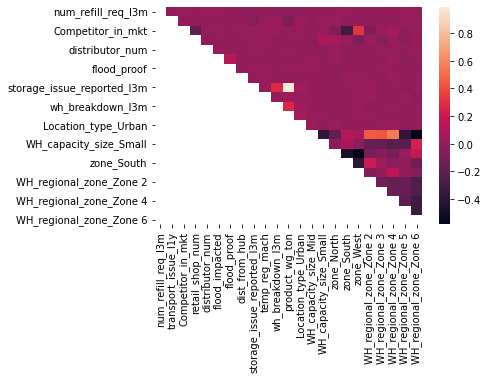

In [45]:
sns.heatmap(upper)

Value of r	Strength of relationship
-1.0 to -0.7 or 1.0 to 0.7	Strong
-0.5 to -0.3 or 0.3 to 0.5	Moderate
-0.3 to -0.1 or 0.1 to 0.3	Weak

In [46]:
neg_corr=[column for column in upper.columns if any(upper[column]<=-0.7)]
pos_corr=[column for column in upper.columns if any(upper[column]>=0.7)]

In [47]:
print("high negative corr\n",neg_corr)
print("high positive corr\n",pos_corr)  

high negative corr
 []
high positive corr
 ['product_wg_ton']


As we can see there are no correlation between dependent features 

Now we will split the data in X and Y

In [50]:
X=df1.drop(["product_wg_ton"],axis=1)
Y=df1["product_wg_ton"]

In [51]:
X.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
4,3,1,2,4740,42,1,0,112,18,0,...,0,0,1,0,0,0,0,0,1,0
5,8,0,2,5053,37,0,0,152,23,1,...,0,1,0,0,1,0,0,0,0,0
6,8,0,4,4449,38,0,0,77,24,0,...,0,0,0,0,1,0,0,0,0,1
8,8,1,4,5381,42,0,0,124,13,1,...,0,1,0,1,0,0,0,0,0,1
10,7,1,3,4623,31,0,0,150,17,0,...,0,0,1,0,0,0,0,0,0,1


In [52]:
# Y is taget Feature 
Y.head()

4     24071
5     32134
6     30142
8     18082
10    21125
Name: product_wg_ton, dtype: int64

Now we will Scale our Data

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scale=MinMaxScaler()
X_scale=scale.fit_transform(X)

In [55]:
X=pd.DataFrame(X_scale,columns=X.columns)



In [56]:
X.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,0.0,0.25,0.166667,0.317732,0.490909,1.0,0.0,0.263889,0.400000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.00,0.166667,0.351801,0.400000,0.0,0.0,0.449074,0.542857,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.00,0.333333,0.286056,0.418182,0.0,0.0,0.101852,0.571429,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.25,0.333333,0.387504,0.490909,0.0,0.0,0.319444,0.257143,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.8,0.25,0.250000,0.304996,0.290909,0.0,0.0,0.439815,0.371429,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Now we will Split the data into train and test

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=100)

In [59]:
X_train.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
10663,0.2,0.00,0.500000,0.135191,0.290909,1.0,0.0,0.560185,1.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1871,0.4,0.25,0.416667,0.250027,0.618182,0.0,0.0,0.351852,0.514286,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3541,0.0,0.00,0.166667,0.423642,0.563636,0.0,0.0,0.416667,0.542857,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10231,0.0,0.00,0.250000,0.292043,0.618182,0.0,0.0,0.888889,0.228571,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
159,0.8,0.00,0.083333,0.322739,0.509091,0.0,0.0,0.495370,0.514286,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
Y_train.head()

21992    48122
3828     29091
7194     29087
21080    16147
346      29131
Name: product_wg_ton, dtype: int64

# Model Building

In [61]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics
lr=LinearRegression()
ls=Lasso()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
DT=DecisionTreeRegressor()

In [62]:
for model in[lr,DT,ls,rf,gb]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    r2=metrics.r2_score(Y_test, y_pred)
    MAE=metrics.mean_absolute_error(Y_test, y_pred)
    MAPE=metrics.mean_absolute_percentage_error(Y_test, y_pred)*100
    MSE=metrics.mean_squared_error(Y_test, y_pred)
    RMSE=np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    
    print("Accuracy",r2)
    print("MAE:",MAE)
    print()
    print("MAPE:",MAPE )
    print()
    print("MSE:",MSE )
    print()
    print("RMSE:",RMSE )

Performance of LinearRegression()
Accuracy 0.983128949157467
MAE: 1176.7047563525143

MAPE: 5.408673595992726

MSE: 2241566.5665910775

RMSE: 1497.186216404318
Performance of DecisionTreeRegressor()
Accuracy 0.9701562294851975
MAE: 1472.3520197856553

MAPE: 6.609435359838178

MSE: 3965182.65704864

RMSE: 1991.2766400097803
Performance of Lasso()
Accuracy 0.9831409485439501
MAE: 1175.472805329588

MAPE: 5.393660158494612

MSE: 2239972.2720915126

RMSE: 1496.6536914368376
Performance of RandomForestRegressor()
Accuracy 0.9841263726553802
MAE: 1133.1257213520198

MAPE: 5.117599737599145

MSE: 2109044.2248281115

RMSE: 1452.2548759870326
Performance of GradientBoostingRegressor()
Accuracy 0.9857053215699875
MAE: 1091.3756473102055

MAPE: 4.886073380611517

MSE: 1899257.7017257034

RMSE: 1378.1355890207985


As we can see we are getting Best accuracy in GradientBoostingRegressor so we are getting 98.5% accuracy and mean_absolute_percentage_error is only 4.8 it is mean our model is working perfectly 

In [63]:
gb=GradientBoostingRegressor()

In [64]:
gb.fit(X_train,Y_train)

GradientBoostingRegressor()

In [65]:
y_pred=gb.predict(X_test)

In [66]:
print("MAE:", metrics.mean_absolute_error(Y_test, y_pred))
print()
print("MAPE:", metrics.mean_absolute_percentage_error(Y_test, y_pred)*100)
print()
print("MSE:", metrics.mean_squared_error(Y_test, y_pred))
print()
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 1091.3756473102055

MAPE: 4.886073380611519

MSE: 1899257.7017257034

RMSE: 1378.1355890207985


In [67]:
print("Accuracy:", metrics.r2_score(Y_test, y_pred))

Accuracy: 0.9857053215699875


We are geeting Accuracy 98.57%

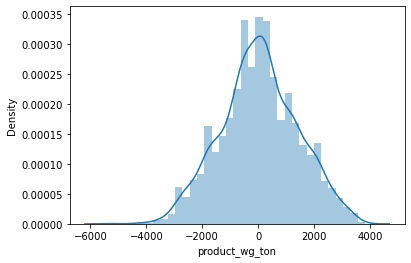

In [68]:
# Evaluation
sns.distplot(Y_test - y_pred)
plt.show()

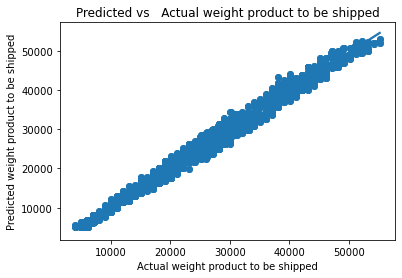

In [69]:
plt.scatter(Y_test, y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=Y_test, y=y_pred)

plt.xlabel('Actual weight product to be shipped')
plt.ylabel('Predicted weight product to be shipped')
plt.title('Predicted vs   Actual weight product to be shipped')
plt.show()


# CONCLUSION

As we can see, Random forest ,Lasso and decision tree, Gradient Boosting Regressor are performing    really well on the datasets. But we got best results in Gradient Boosting Regressor.

Gradient Boosting  achieved 98.57 accuracy .

We have achieved mean absolute percentage error  4.8 which is very less .


We have conclude that in north zone the demand and supply is high but at the same time there are      maximum no. of stock related issues reported from north zone so Company has to prevent the stock storage issue happen due to rodents and moisture etc.
Due to mismanagement in warehouse company is unable to match its demand and supply effectively. 
By Preventing from these issues company can optimize its supply as per demand, and able to shipped the
optimum weight of the product each time to the warehouse.


Break Down problem is a major issue, we have analyzed in north zone the consumption of goods is high, Due to breakdown the availability of goods to the supplier and retailer gets effected. That will be the cause of fluctuation in demand and supply

Company should focus on east zone also . They should increase their marketing and distribution channel because there are less competitors exists.

Another Focus area for company is Urban Area, in this company should focus on distribution network where they will face less challenges of transportation and storage issues.
 


In [2]:
x=9015062209


In [3]:
print(type(x))

<class 'int'>


In [6]:
x=str(x)
if x==x[::-1]:
    print(True)
else:    
    print(False)

False
